# BHARAT INTERN TASK
# Task 1:Stock Prediction 
## In this task we predict the Netflix stock price using LSTM.

### 1 - Importing Libraries

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 2 - Reading Dataset

In [2]:
data = pd.read_csv('NFLX.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900
...,...,...,...,...,...,...,...
3114,2022-05-17,189.169998,191.399994,185.169998,190.559998,190.559998,9876700
3115,2022-05-18,186.720001,187.699997,176.270004,177.190002,177.190002,9665600
3116,2022-05-19,178.050003,186.300003,175.710007,183.479996,183.479996,10448500
3117,2022-05-20,185.869995,190.190002,179.770004,186.350006,186.350006,10422600


In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3.119000e+03
mean,185.774606,188.574990,182.773507,185.747629,185.747629,1.879939e+07
std,182.675775,185.222112,179.874082,182.575796,182.575796,2.091301e+07
min,6.960000,7.178571,6.931429,7.018571,7.018571,1.144000e+06
25%,33.255714,33.815000,32.611429,33.328571,33.328571,6.233250e+06
50%,100.209999,102.110001,98.529999,100.230003,100.230003,1.232560e+07
75%,336.800003,342.384995,331.125000,337.539993,337.539993,2.342225e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.155418e+08


In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3114,2022-05-17,189.169998,191.399994,185.169998,190.559998,190.559998,9876700
3115,2022-05-18,186.720001,187.699997,176.270004,177.190002,177.190002,9665600
3116,2022-05-19,178.050003,186.300003,175.710007,183.479996,183.479996,10448500
3117,2022-05-20,185.869995,190.190002,179.770004,186.350006,186.350006,10422600
3118,2022-05-23,186.149994,187.660004,177.889999,187.440002,187.440002,9558000


In [5]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
data['Date'].value_counts()

2010-01-04    1
2018-05-01    1
2018-03-29    1
2018-04-02    1
2018-04-03    1
             ..
2014-02-25    1
2014-02-26    1
2014-02-27    1
2014-02-28    1
2022-05-23    1
Name: Date, Length: 3119, dtype: int64

### 3 - Data Visualization

<Axes: >

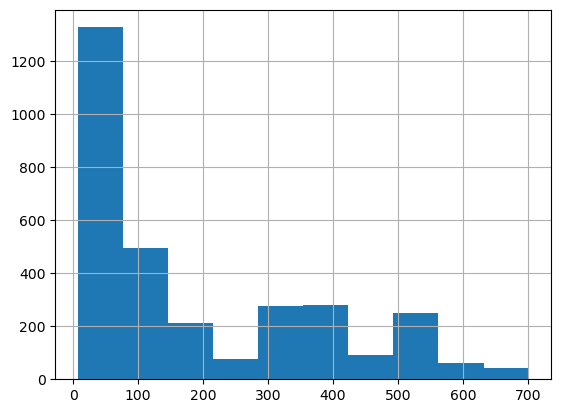

In [7]:
data['High'].hist()

<Axes: >

<Figure size 2000x800 with 0 Axes>

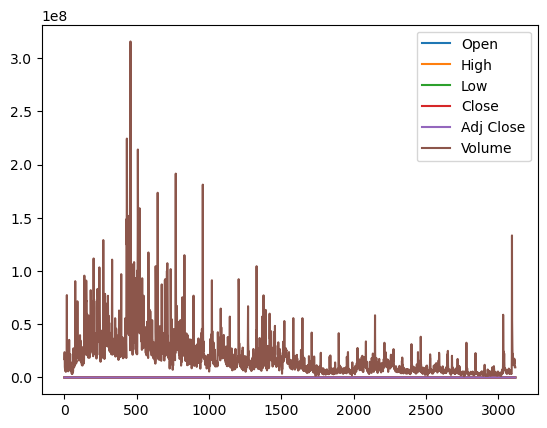

In [8]:
plt.figure(figsize=(20,8))
data.plot()

In [9]:
data_set = data.filter(['Close'])
dataset = data.values
training_data_len=math.ceil(len(data) * 8)
training_data_len

24952

In [10]:
dataset

array([['2010-01-04', 7.931429, 7.961429, ..., 7.64, 7.64, 17239600],
       ['2010-01-05', 7.652857, 7.657143, ..., 7.358571, 7.358571,
        23753100],
       ['2010-01-06', 7.361429, 7.672857, ..., 7.617143, 7.617143,
        23290400],
       ...,
       ['2022-05-19', 178.050003, 186.300003, ..., 183.479996,
        183.479996, 10448500],
       ['2022-05-20', 185.869995, 190.190002, ..., 186.350006,
        186.350006, 10422600],
       ['2022-05-23', 186.149994, 187.660004, ..., 187.440002,
        187.440002, 9558000]], dtype=object)

In [11]:
data = data.iloc[:, 0:5]
data

,Date,Open,High,Low,Close
0,2010-01-04,7.931429,7.961429,7.565714,7.640000
1,2010-01-05,7.652857,7.657143,7.258571,7.358571
2,2010-01-06,7.361429,7.672857,7.197143,7.617143
3,2010-01-07,7.731429,7.757143,7.462857,7.485714
4,2010-01-08,7.498571,7.742857,7.465714,7.614286
...,...,...,...,...,...
3114,2022-05-17,189.169998,191.399994,185.169998,190.559998
3115,2022-05-18,186.720001,187.699997,176.270004,177.190002
3116,2022-05-19,178.050003,186.300003,175.710007,183.479996
3117,2022-05-20,185.869995,190.190002,179.770004,186.350006


In [12]:
training_set = data.iloc[:, 1:2].values
training_set

array([[  7.931429],
       [  7.652857],
       [  7.361429],
       ...,
       [178.050003],
       [185.869995],
       [186.149994]])

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
data_training_scaled = scaler.fit_transform(training_set)

In [14]:
features_set = []
labels = []
for i in range(60, 586):
    features_set.append(data_training_scaled[i - 60:i, 0])
    labels.append(data_training_scaled[i, 0])

In [15]:
features_set, labels = np.array(features_set), np.array(labels)

In [16]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
features_set.shape

(526, 60, 1)

### 4 - LSTM

In [17]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [44]:
model = Sequential()
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(features_set, labels, epochs=50, batch_size=20)

Epoch 1/50
27/27 [==============================] - 0s 571us/step - loss: 7.3047e-05
Epoch 2/50
27/27 [==============================] - 0s 585us/step - loss: 7.3047e-05
Epoch 3/50
27/27 [==============================] - 0s 778us/step - loss: 7.3047e-05
Epoch 4/50
27/27 [==============================] - 0s 596us/step - loss: 7.3047e-05
Epoch 5/50
27/27 [==============================] - 0s 686us/step - loss: 7.3047e-05
Epoch 6/50
27/27 [==============================] - 0s 829us/step - loss: 7.3047e-05
Epoch 7/50
27/27 [==============================] - 0s 986us/step - loss: 7.3047e-05
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 7.3047e-05
Epoch 9/50
27/27 [==============================] - 0s 814us/step - loss: 7.3047e-05
Epoch 10/50
27/27 [==============================] - 0s 582us/step - loss: 7.3047e-05
Epoch 11/50
27/27 [==============================] - 0s 625us/step - loss: 7.3047e-05
Epoch 12/50
27/27 [==============================] - 0s 687us/ste

In [21]:
data_testing_complete = pd.read_csv('NFLX.csv')
data_testing_processed = data_testing_complete.iloc[:, 1:2]
data_testing_processed

,Open
0,7.931429
1,7.652857
2,7.361429
3,7.731429
4,7.498571
...,...
3114,189.169998
3115,186.720001
3116,178.050003
3117,185.869995


In [22]:
data_total = pd.concat((data['Open'], data['Open']), axis=0)

In [23]:
test_inputs = data_total[len(data_total) - len(data) - 60:].values
test_inputs.shape

(3179,)

In [24]:
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)

In [25]:
test_feature =[]
for i in range(60, 89):
    test_feature.append(test_inputs[i-60:i, 0])

In [26]:
test_feature = np.array(test_feature)
test_feature = np.reshape(test_feature, (test_feature.shape[0] - test_feature.shape[1], 1))
test_feature.shape

(1740, 1)

In [27]:
predictions = model.predict(test_feature)

In [28]:
predictions

array([[0.5549687 ],
       [0.5611988 ],
       [0.55730313],
       ...,
       [0.00257205],
       [0.0027909 ],
       [0.00260332]], dtype=float32)

In [29]:
x_train = data[0:1256]
y_train = data[1:1257]
print(x_train.shape)
print(y_train.shape)

(1256, 5)
(1256, 5)


In [30]:
x_train

,Date,Open,High,Low,Close
0,2010-01-04,7.931429,7.961429,7.565714,7.640000
1,2010-01-05,7.652857,7.657143,7.258571,7.358571
2,2010-01-06,7.361429,7.672857,7.197143,7.617143
3,2010-01-07,7.731429,7.757143,7.462857,7.485714
4,2010-01-08,7.498571,7.742857,7.465714,7.614286
...,...,...,...,...,...
1251,2014-12-22,48.542858,49.240002,47.748569,48.097141
1252,2014-12-23,48.287144,48.428570,47.472858,48.061428
1253,2014-12-24,48.072857,49.070000,47.998569,48.871429
1254,2014-12-26,48.844288,49.484287,48.534286,48.578571


In [31]:
np.random.seed(1)
np.random.randn(3, 3)

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ]])

In [32]:
np.random.normal(1)

0.7506296245225899

In [33]:
np.random.normal(5)

6.4621079370449745

In [34]:
np.random.seed(42)

In [35]:
np.random.normal(size=1000, scale=100).std()

97.87262077473541

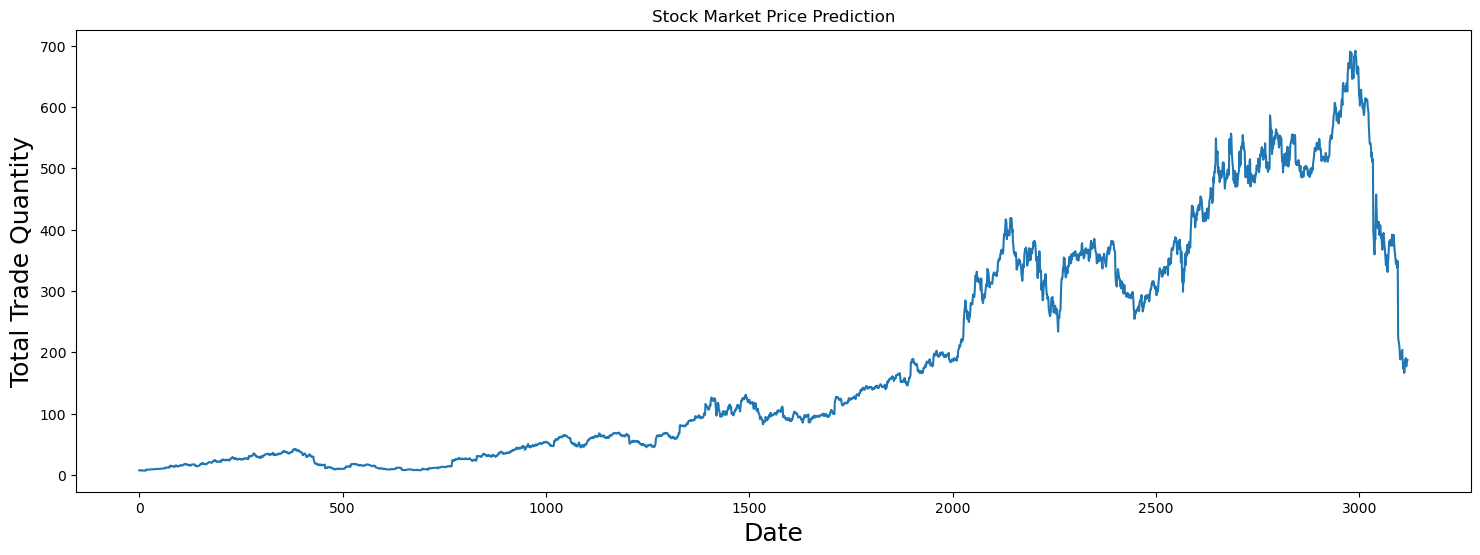

In [36]:
plt.figure(figsize=(18,6))
plt.title("Stock Market Price Prediction")
plt.plot(data_testing_complete['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()

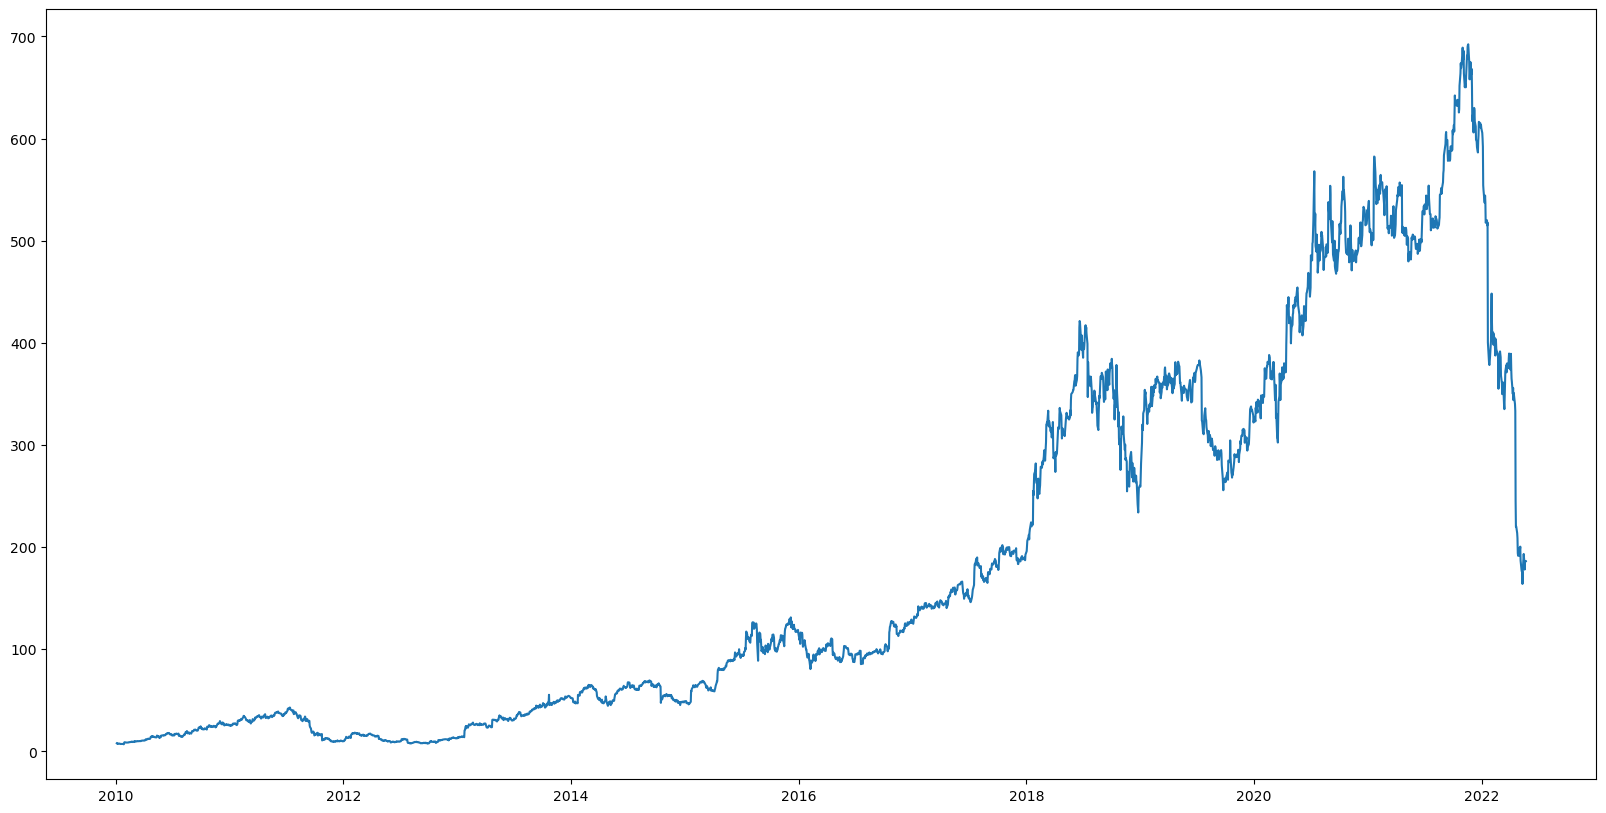

In [37]:
data["Date"] = pd.to_datetime(data.Date)
data.index = data['Date']

plt.figure(figsize=(20, 10))
plt.plot(data["Open"], label='ClosePriceHist')

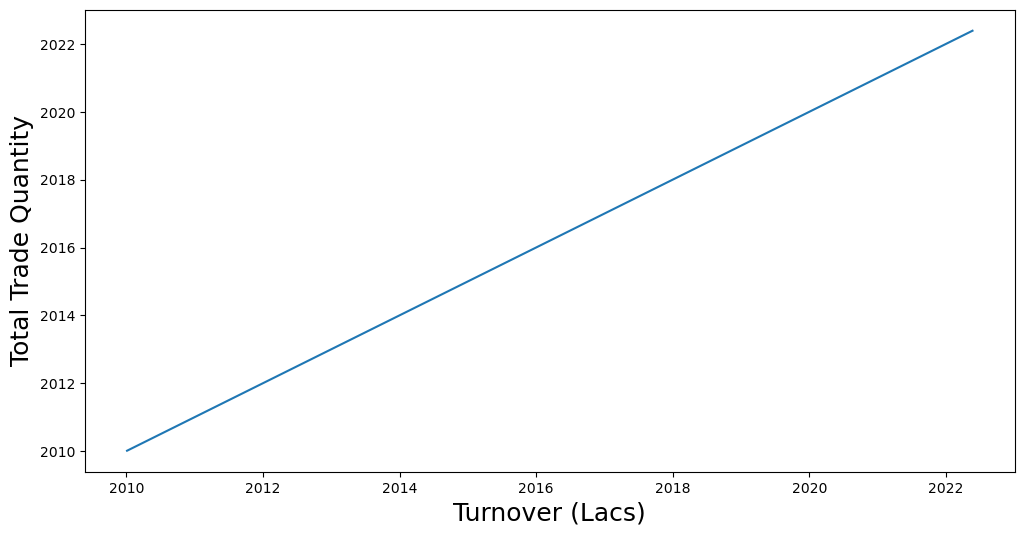

In [38]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'])
plt.xlabel('Turnover (Lacs)', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()

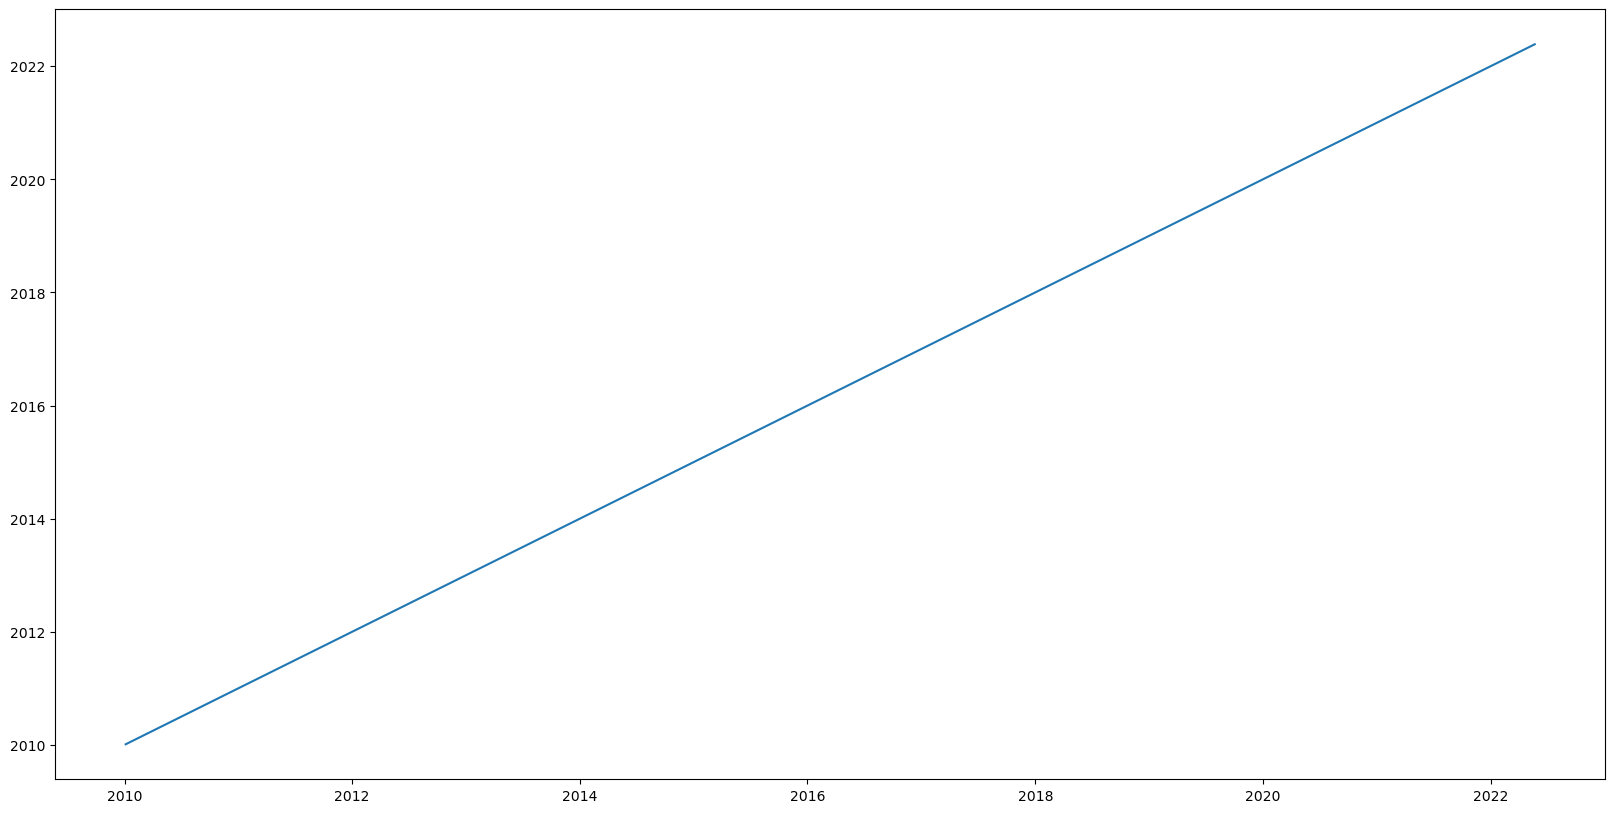

In [39]:
data["Turnover (Lacs)"] = pd.to_datetime(data.Date)
data.index = data['Turnover (Lacs)']

plt.figure(figsize=(20, 10))
plt.plot(data["Turnover (Lacs)"], label='ClosePriceHist')

<Axes: xlabel='Turnover (Lacs)'>

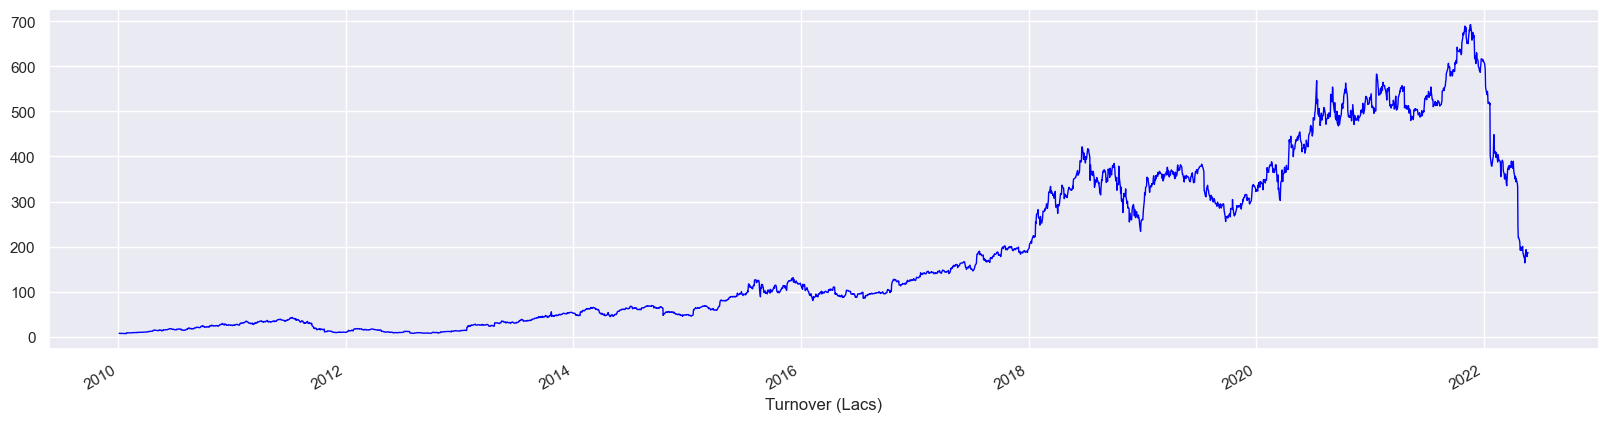

In [40]:
sns.set(rc = {'figure.figsize': (20, 5)})
data['Open'].plot(linewidth = 1,color='blue')

In [41]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Turnover (Lacs)'], dtype='object')

In [42]:
df = pd.read_csv('NFLX.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900
...,...,...,...,...,...,...,...
3114,2022-05-17,189.169998,191.399994,185.169998,190.559998,190.559998,9876700
3115,2022-05-18,186.720001,187.699997,176.270004,177.190002,177.190002,9665600
3116,2022-05-19,178.050003,186.300003,175.710007,183.479996,183.479996,10448500
3117,2022-05-20,185.869995,190.190002,179.770004,186.350006,186.350006,10422600


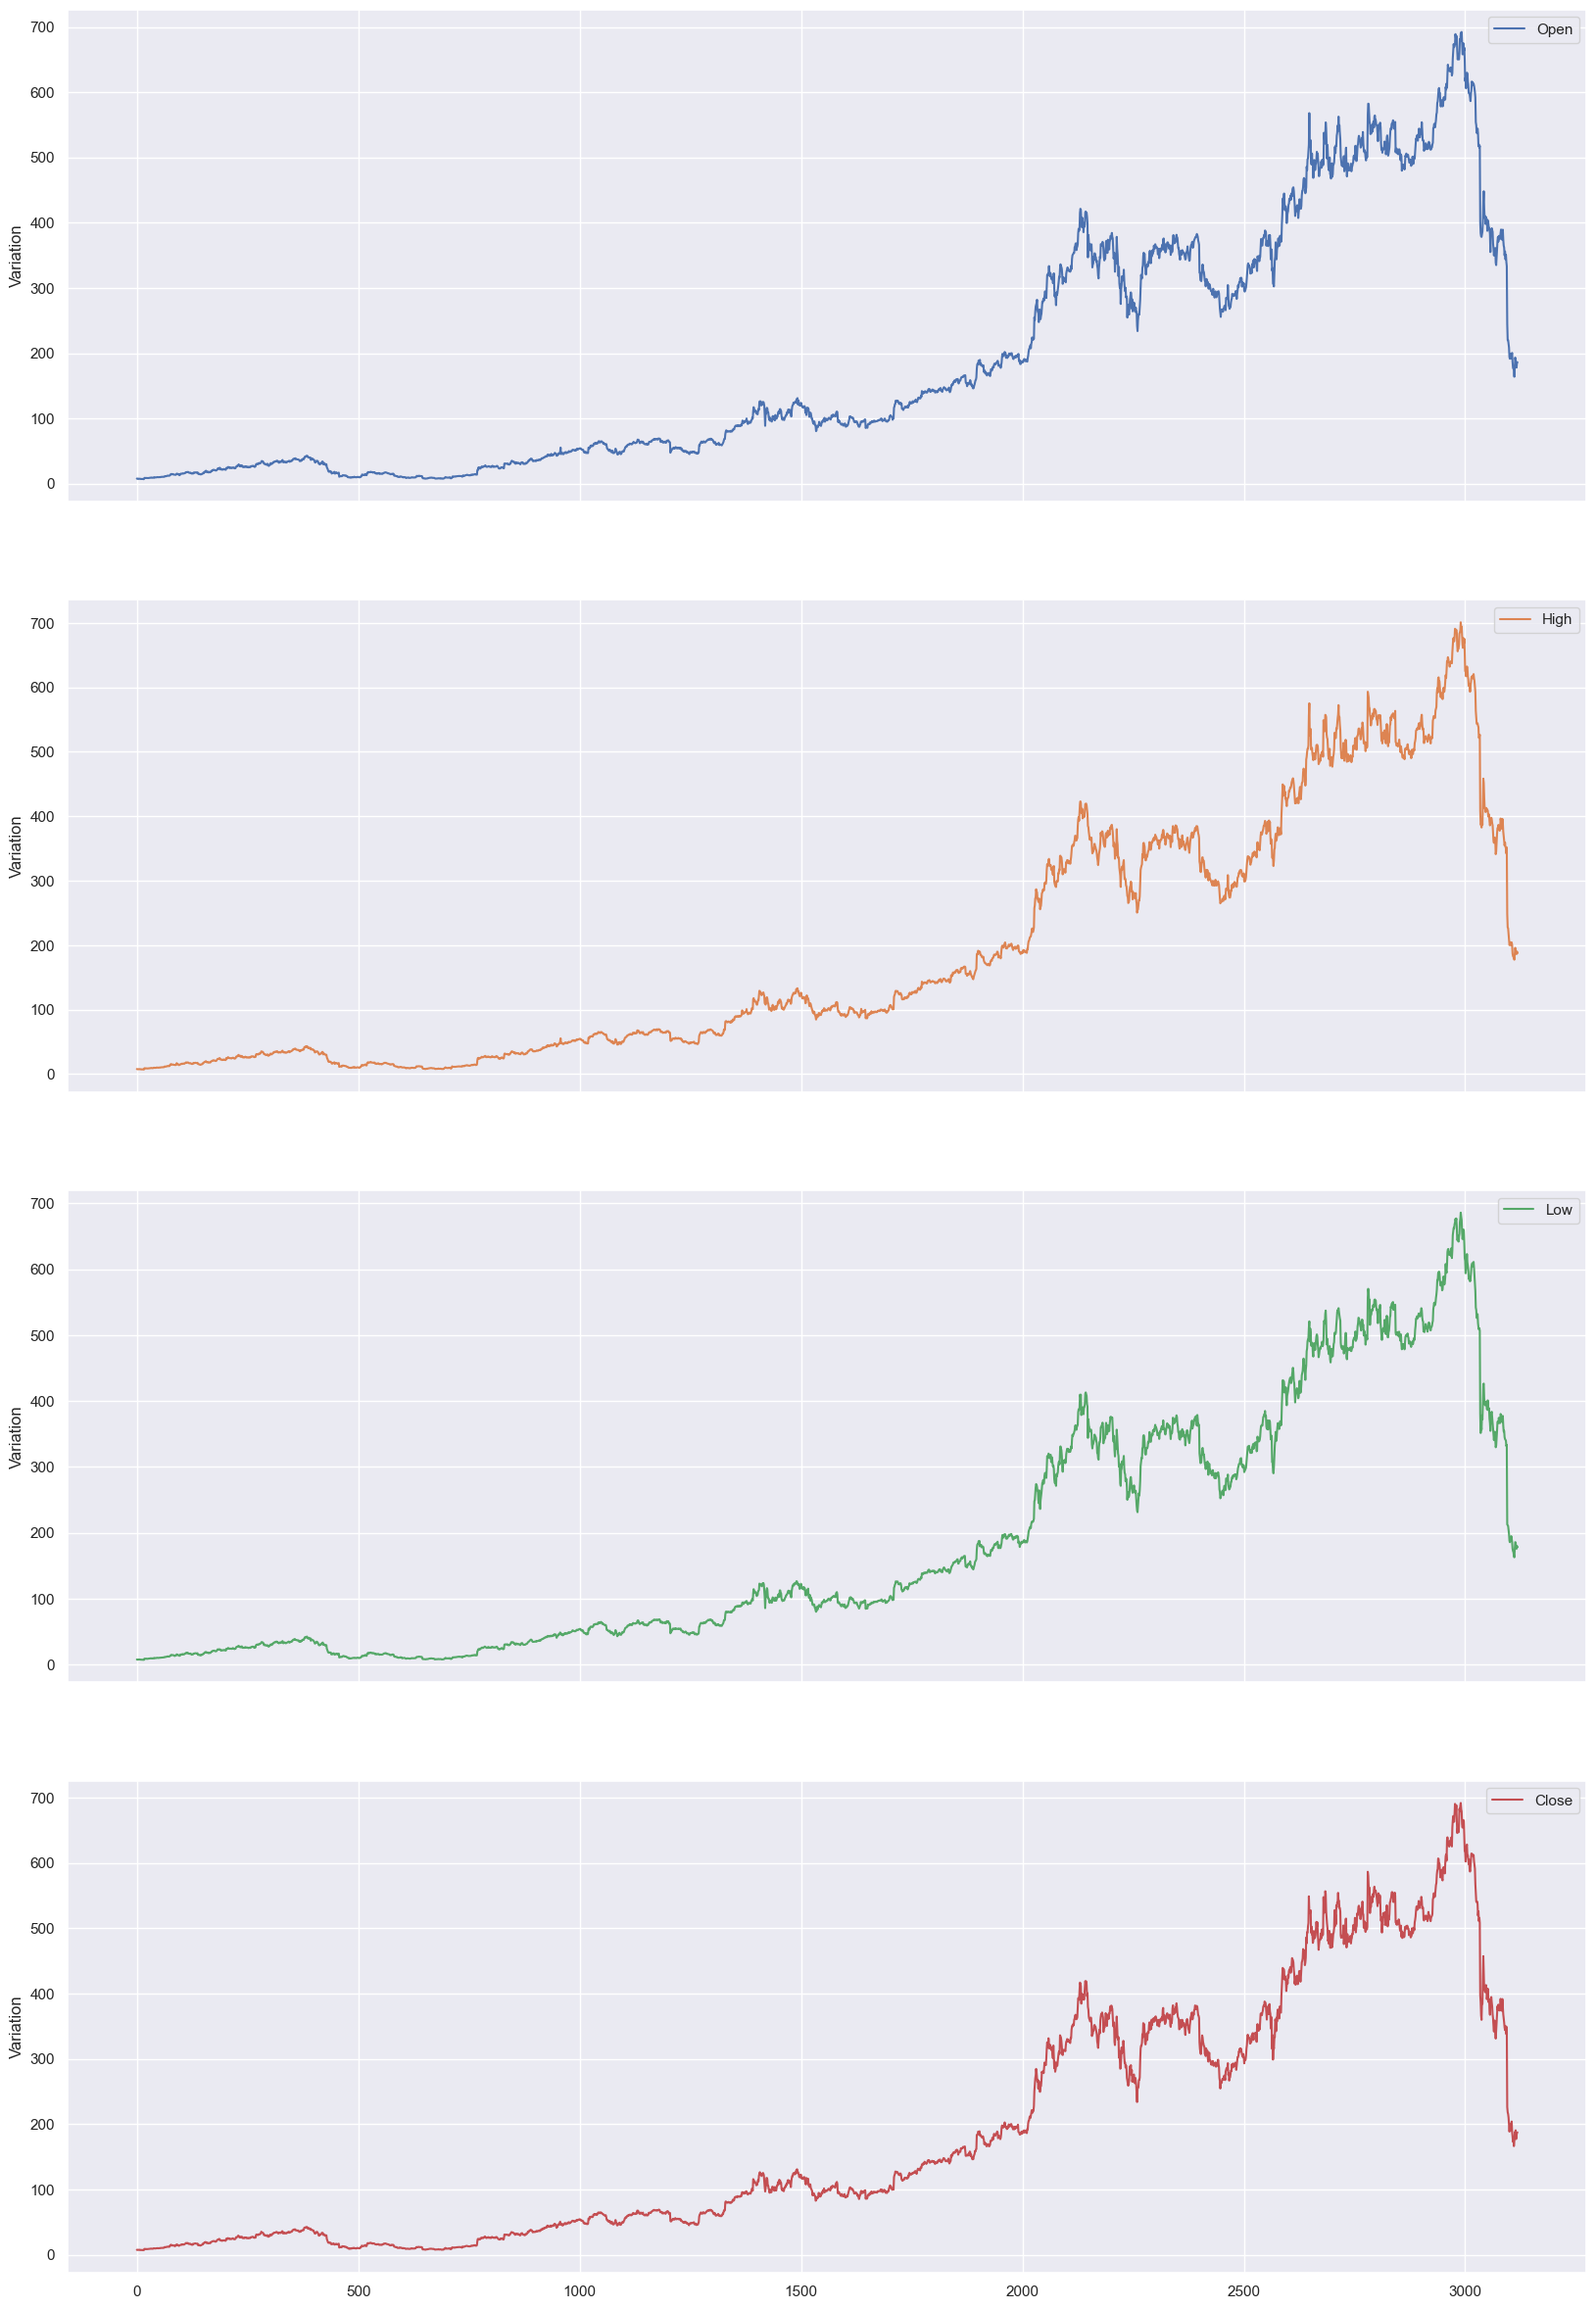

In [43]:
cols_plot = ['Open','High','Low','Close']
axes = df[cols_plot].plot(alpha = 1, figsize=(20, 30), subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')

# Thank You!